2.2919457792880644
7.341989398780903
2.5750294470194457
13.616767210848074
********************************
4.9411384570702115
0.8546427230076175
4.288004464030211
********************************
0.8682993119508601
0.9924323625947724
0.8059485904903442
1.133736057707506
********************************
0.30569728906069643
0.14238118428875776
0.40671014390351357


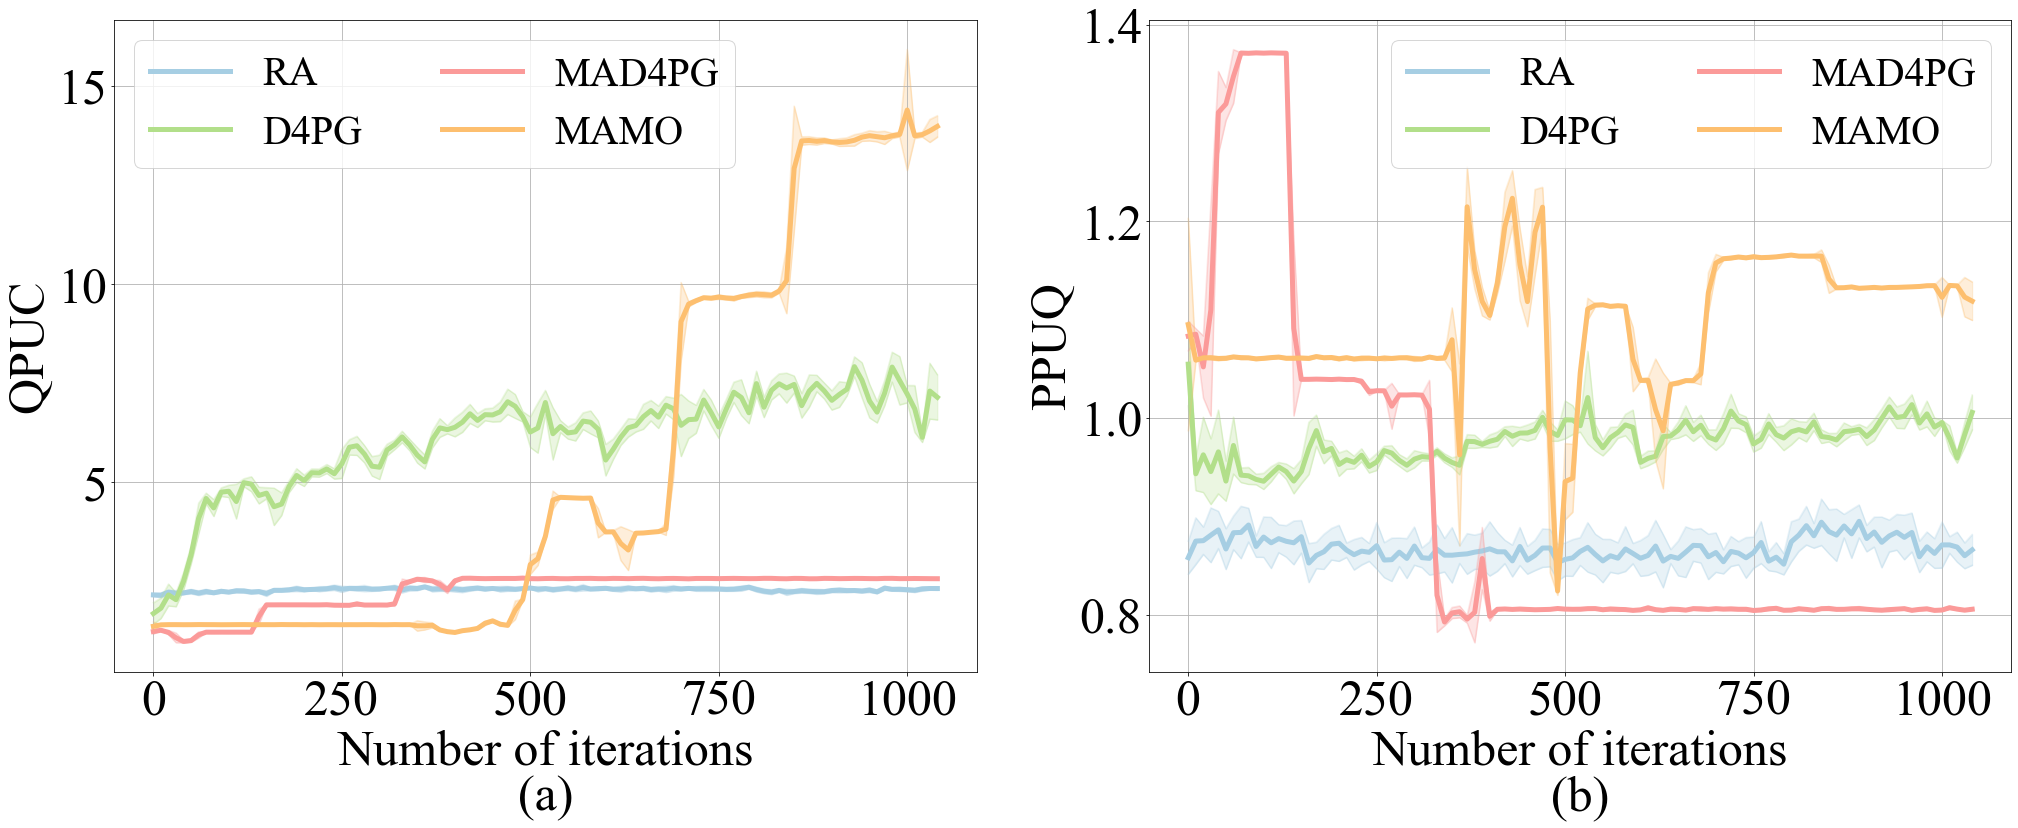

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import pandas as pd
import brewer2mpl
import math

# brewer2mpl.get_map args: set name set type number of colors
bmap = brewer2mpl.get_map('Paired', 'qualitative', 10)
colors = bmap.mpl_colors

colors = colors[0: 10]

fig_title = ['(a)', '(b)']

labels = ['RA', 'D4PG', 'MAD4PG', 'MAMO']

markers = ['*', 'd', 's', '^', 'o']
font_size = 50
legend_size = 40
markersize = 20
plt.figure(figsize=(34, 12))            # 确定图像画布的大小
plt.rcParams['font.family'] = 'Times New Roman' # 设置字体
# x_label = 'Traffic Scenario'
#################################################################### #################################################################

def get_mean_and_standard_deviation_result(result, ranges, max_num):
    """From a list of lists of agent results it extracts the mean results and the mean results plus or minus
        some multiple of the standard deviation"""
    mean_results = []
    mean_minus_std = []
    mean_plus_std = []
    index = 0
    for i in range(int(max_num / ranges) - 1):
        result_at_a_range = result[index: index + ranges]
        index += ranges
        mean_result = np.mean(result_at_a_range)
        std_result = np.std(result_at_a_range)
        mean_results.append(mean_result)
        mean_minus_std.append(mean_result - std_result)
        mean_plus_std.append(mean_result + std_result)
    
    result_at_a_range = result[-ranges:]
    mean_result = np.mean(result_at_a_range)
    std_result = np.std(result_at_a_range)
    mean_results.append(mean_result)
    mean_minus_std.append(mean_result - std_result)
    mean_plus_std.append(mean_result + std_result)
    return mean_minus_std, mean_results, mean_plus_std


def draw_one_result(axe, epoch_index, rewards, ranges, max_num, colors, line_label, linewidth=5.0):
    mean_minus_std, mean_results, mean_plus_std = get_mean_and_standard_deviation_result(rewards, ranges, max_num)
    x_vals = list(range(len(mean_results)))
    nex_x_vals = [x * ranges for x in x_vals]
    axe.plot(nex_x_vals, mean_results, color=colors[0], label=line_label, linewidth=linewidth)
    axe.plot(nex_x_vals, mean_plus_std, color=colors[0], alpha=0.25)
    axe.plot(nex_x_vals, mean_minus_std, color=colors[0], alpha=0.25)
    axe.fill_between(nex_x_vals, y1=mean_minus_std, y2=mean_plus_std, alpha=0.25, color=colors[0])



plt.subplot(1, 2, 1)                        # 将画布分为两列
x_label = 'Number of iterations'
plt.xlabel(x_label, fontsize=font_size)                          # x轴的label
plt.ylabel('QPUC', fontsize=font_size)          # y轴的label     备注（plot所有的原件都可以加fontsize属性）
plt.title(fig_title[0], fontsize=font_size, y=-0.22)     # 图的title

xys = pd.read_csv("Fig5-3-different-algorithms-CR.csv", names=["", "ra_cvsq", "ra_cvsp", "d4pg_cvsq", "d4pg_cvsp", "mad4pg_cvsq", "mad4pg_cvsp", "mamo_cvsq", "mamo_cvsp"], header=0)

epoch_index = xys[""].values.tolist()

ra_x = xys["ra_cvsq"].values.tolist()
ra_y = xys["ra_cvsp"].values.tolist()
d4pg_x = xys["d4pg_cvsq"].values.tolist()
d4pg_y = xys["d4pg_cvsp"].values.tolist()
mad4pg_x = xys["mad4pg_cvsq"].values.tolist()
mad4pg_y = xys["mad4pg_cvsp"].values.tolist()
mamo_x = xys["mamo_cvsq"].values.tolist()
mamo_y = xys["mamo_cvsp"].values.tolist()
plt.grid()

ra = [0 for i in range(len(ra_x))]
d4pg = [0 for i in range(len(ra_x))]
mad4pg = [0 for i in range(len(ra_x))]
mamo = [0 for i in range(len(ra_x))]
for i in range(len(ra_x)):
    ra[i] = ra_x[i] / (300 - ra_y[i])
    d4pg[i] = d4pg_x[i] / (300 - d4pg_y[i])
    mad4pg[i] = mad4pg_x[i] / (300 - mad4pg_y[i])
    mamo[i] = mamo_x[i] / (300 - mamo_y[i])

print(np.array(ra).mean())
print(np.array(d4pg[800:1000]).mean())
print(np.array(mad4pg[410:1000]).mean())
print(np.array(mamo[850:1000]).mean())
print("*" * 32)
print((np.array(mamo[850:1000]).mean() - np.array(ra).mean()) / np.array(ra).mean())
print((np.array(mamo[850:1000]).mean() - np.array(d4pg[800:1000]).mean()) / np.array(d4pg[800:1000]).mean())
print((np.array(mamo[850:1000]).mean() - np.array(mad4pg[410:1000]).mean()) / np.array(mad4pg[410:1000]).mean())


ranges = 10
max_num = 1050
y_min = 0

draw_one_result(plt, epoch_index, np.array(ra), ranges, max_num, colors[0:2], line_label=labels[0])
draw_one_result(plt, epoch_index, np.array(d4pg), ranges, max_num, colors[2:4], line_label=labels[1])
draw_one_result(plt, epoch_index, np.array(mad4pg), ranges, max_num, colors[4:6], line_label=labels[2])
draw_one_result(plt, epoch_index, np.array(mamo), ranges, max_num, colors[6:8], line_label=labels[3])

# plt.xlim(100, 300)  
# plt.ylim(150, 300)                     # 设置y轴的取值范围，如设置（0,5）则y轴坐标为从0开始，到5结束
# 刻度值字体大小设置
plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
plt.legend(loc=0, fontsize = legend_size, ncol =2)     # 显示图例，loc=0表示图例会根据图片情况自动摆放
# plt.show()


plt.subplot(1, 2, 2)                        # 将画布分为两列
x_label = 'Number of iterations'
plt.xlabel(x_label, fontsize=font_size)                          # x轴的label
plt.ylabel('PPUQ', fontsize=font_size)          # y轴的label     备注（plot所有的原件都可以加fontsize属性）
plt.title(fig_title[1], fontsize=font_size, y=-0.22)     # 图的title

xys = pd.read_csv("Fig5-3-different-algorithms-CR.csv", names=["", "ra_cvsq", "ra_cvsp", "d4pg_cvsq", "d4pg_cvsp", "mad4pg_cvsq", "mad4pg_cvsp", "mamo_cvsq", "mamo_cvsp"], header=0)

epoch_index = xys[""].values.tolist()

ra_x = xys["ra_cvsq"].values.tolist()
ra_y = xys["ra_cvsp"].values.tolist()
d4pg_x = xys["d4pg_cvsq"].values.tolist()
d4pg_y = xys["d4pg_cvsp"].values.tolist()
mad4pg_x = xys["mad4pg_cvsq"].values.tolist()
mad4pg_y = xys["mad4pg_cvsp"].values.tolist()
mamo_x = xys["mamo_cvsq"].values.tolist()
mamo_y = xys["mamo_cvsp"].values.tolist()
plt.grid()

ra = [0 for i in range(len(ra_x))]
d4pg = [0 for i in range(len(ra_x))]
mad4pg = [0 for i in range(len(ra_x))]
mamo = [0 for i in range(len(ra_x))]
for i in range(len(ra_x)):
    ra[i] = ra_y[i] / ra_x[i]
    d4pg[i] = d4pg_y[i] / d4pg_x[i]
    mad4pg[i] = mad4pg_y[i] / mad4pg_x[i]
    mamo[i] = mamo_y[i] / mamo_x[i]

print("*" * 32)
print(np.array(ra).mean())
print(np.array(d4pg[800:1000]).mean())
print(np.array(mad4pg[410:1000]).mean())
print(np.array(mamo[850:1000]).mean())

print("*" * 32)

print((np.array(mamo[850:1000]).mean() - np.array(ra).mean()) / np.array(ra).mean())
print((np.array(mamo[850:1000]).mean() - np.array(d4pg[800:1000]).mean()) / np.array(d4pg[800:1000]).mean())
print((np.array(mamo[850:1000]).mean() - np.array(mad4pg[410:1000]).mean()) / np.array(mad4pg[410:1000]).mean())


ranges = 10
max_num = 1050
y_min = 0

draw_one_result(plt, epoch_index, np.array(ra), ranges, max_num, colors[0:2], line_label=labels[0])
draw_one_result(plt, epoch_index, np.array(d4pg), ranges, max_num, colors[2:4], line_label=labels[1])
draw_one_result(plt, epoch_index, np.array(mad4pg), ranges, max_num, colors[4:6], line_label=labels[2])
draw_one_result(plt, epoch_index, np.array(mamo), ranges, max_num, colors[6:8], line_label=labels[3])

# plt.xlim(100, 300)  
# plt.ylim(0, 15)                     # 设置y轴的取值范围，如设置（0,5）则y轴坐标为从0开始，到5结束
# 刻度值字体大小设置
plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
plt.legend(loc=0, fontsize = legend_size, ncol=2) 
# plt.savefig('different_bandwidth.png', dpi=50)
plt.subplots_adjust(wspace =0.2, hspace =0.15)#调整子图间距
plt.savefig("Fig5-3-different-algorithms.pdf", bbox_inches='tight')
plt.show()
